1. Import sqlite3, pandas and sqlalchemy modules

In [3]:
import sqlite3

In [4]:
import pandas as pd

In [5]:
import sqlalchemy 

2. Create a read-write connection

In [6]:
conn = sqlite3.connect("gcbm_output.db")

3. Create a cursor object

In [7]:
 curs = conn.cursor()

4. To list all the tables in the database, use the cursor’s fetchall() method to get the tables listed in sqlite_master

In [8]:
curs.execute("SELECT name FROM sqlite_master WHERE type = 'table'").fetchall()

[('ClassifierSetDimension',),
 ('DateDimension',),
 ('PoolDimension',),
 ('LandClassDimension',),
 ('ModuleInfoDimension',),
 ('AgeClassDimension',),
 ('LocationDimension',),
 ('DisturbanceTypeDimension',),
 ('DisturbanceDimension',),
 ('Pools',),
 ('Fluxes',),
 ('ErrorDimension',),
 ('LocationErrorDimension',),
 ('AgeArea',),
 ('sqlite_stat1',),
 ('r_change_type_categories',),
 ('sqlite_sequence',),
 ('r_pool_collections',),
 ('r_pool_collection_pools',),
 ('r_flux_indicators',),
 ('r_flux_indicator_collections',),
 ('r_flux_indicator_collection_flux_indicators',),
 ('r_stock_changes',),
 ('r_pool_indicators',),
 ('r_location',),
 ('r_stand_area',),
 ('v_flux_indicators',),
 ('v_flux_indicator_aggregates',),
 ('v_stock_change_indicators',),
 ('v_pool_indicators',),
 ('v_disturbance_indicators',),
 ('v_age_indicators',),
 ('v_error_indicators',),
 ('v_total_disturbed_areas',),
 ('v_disturbance_fluxes',),
 ('v_flux_indicators_density',),
 ('v_flux_indicator_aggregates_density',),
 ('v_s

fetchall() returns a list of tuples, and in this case each tuple has a single element, which is why they each have a trailing comma.

5. Here is an example of a map that gives out the total biomass from the year 1920 to 2020

In [32]:
query = f"""
        SELECT years.year, COALESCE(SUM(i.pool_tc), 0) / 1e6 AS total_biomass_mt
        FROM (SELECT DISTINCT year FROM v_age_indicators ORDER BY year) AS years
        LEFT JOIN v_pool_indicators i
            ON years.year = i.year
        WHERE i.indicator = 'Total Biomass'
            AND (years.year BETWEEN 1920 AND 2020)
        GROUP BY years.year
        ORDER BY years.year
        """

In [33]:

df = pd.read_sql_query(query, conn)

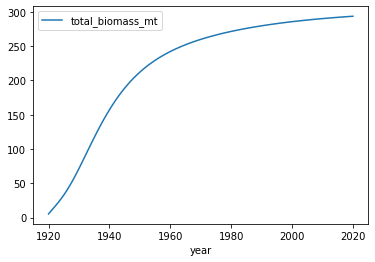

In [34]:
ax = df.plot.line("year")